## Análisis Exploratorio de Datos

In [1]:
# importacion general de librerias 
# y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/events.csv')

pd.set_option('display.max_columns', 51)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [3]:
events_counts = df['event'].value_counts()

Text(0,0.5,'Ocurrencias')

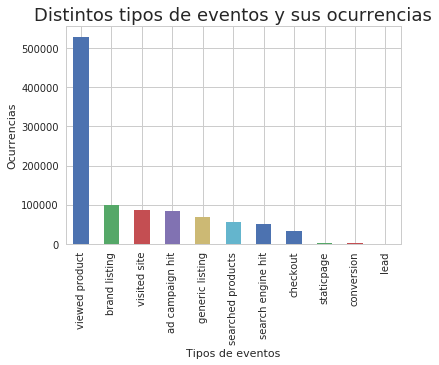

In [4]:
plot_events_counts = events_counts.plot.bar()
plot_events_counts.set_title("Distintos tipos de eventos y sus ocurrencias", fontsize=18)
plot_events_counts.set_xlabel("Tipos de eventos")
plot_events_counts.set_ylabel("Ocurrencias")

### Analizo el comportamiento de los eventos en función de datos temporales

In [5]:
event_date = df[['timestamp', 'event']]
event_date['timestamp'] = pd.to_datetime(event_date['timestamp'])
event_date['month'] = event_date['timestamp'].dt.month
event_date['year'] = event_date['timestamp'].dt.year
event_date['hour'] = event_date['timestamp'].dt.hour
event_date['min'] = event_date['timestamp'].dt.minute
# Lunes = 0, Martes = 1 ...
event_date['dayofweek'] = event_date['timestamp'].dt.dayofweek
event_date.head()

,timestamp,event,month,year,hour,min,dayofweek
0,2018-05-31 23:38:05,ad campaign hit,5,2018,23,38,3
1,2018-05-31 23:38:05,visited site,5,2018,23,38,3
2,2018-05-31 23:38:09,viewed product,5,2018,23,38,3
3,2018-05-31 23:38:40,checkout,5,2018,23,38,3
4,2018-05-29 13:29:25,viewed product,5,2018,13,29,1


In [ ]:
def plotbar_event_vs_dayofweek(event):
    X = event_date.loc[ event_date['event'] == event, : ]
    X = X.groupby('dayofweek').agg({"event" : "count"})
    Xp = X.plot.bar()
    Xp.set_title("Cantidad de eventos " + event + " durante la semana", fontsize=18)
    Xp.set_xlabel("Dia de la semana (0 = Lunes)")
    Xp.set_ylabel("Eventos")
    return Xp

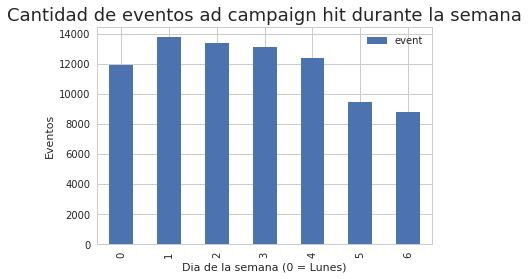

In [16]:
plotbar_event_vs_dayofweek("ad campaign hit")

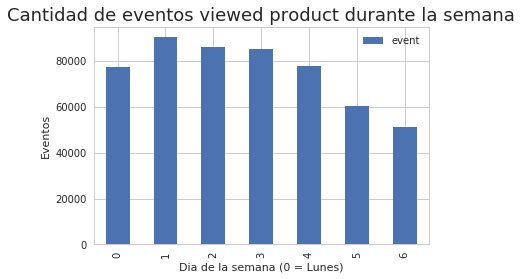

In [18]:
plotbar_event_vs_dayofweek("viewed product")

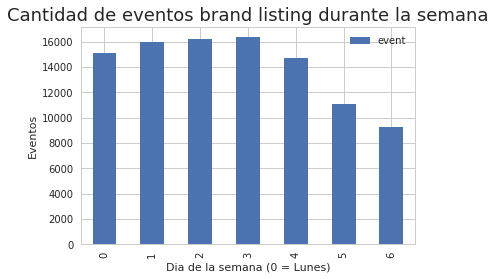

In [19]:
plotbar_event_vs_dayofweek("brand listing")

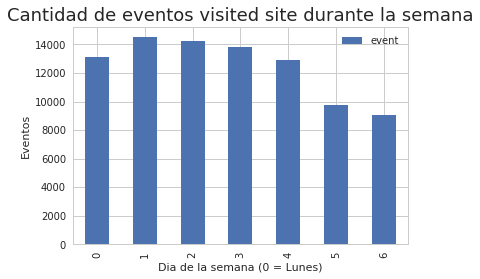

In [20]:
plotbar_event_vs_dayofweek("visited site")

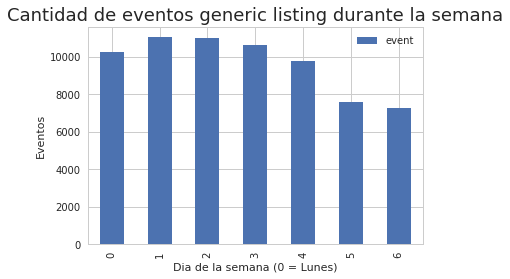

In [21]:
plotbar_event_vs_dayofweek("generic listing")

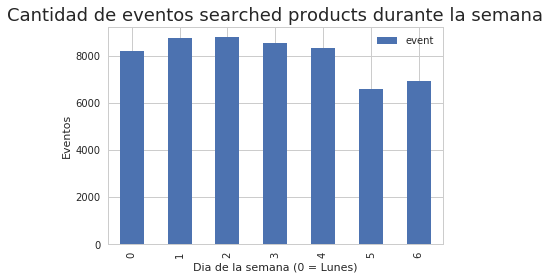

In [22]:
plotbar_event_vs_dayofweek("searched products")

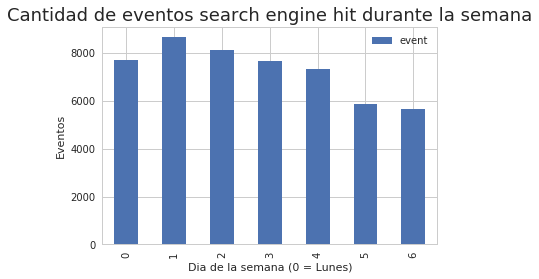

In [23]:
plotbar_event_vs_dayofweek("search engine hit")

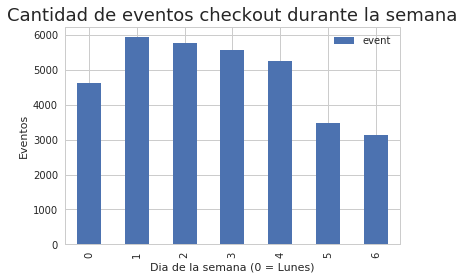

In [24]:
plotbar_event_vs_dayofweek("checkout")

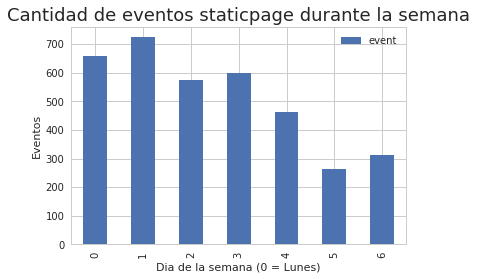

In [25]:
plotbar_event_vs_dayofweek("staticpage")

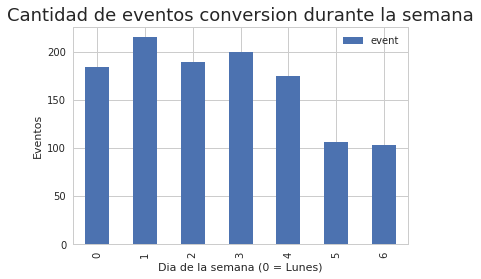

In [26]:
plotbar_event_vs_dayofweek("conversion")

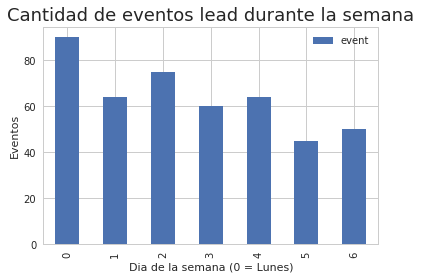

In [27]:
plotbar_event_vs_dayofweek("lead")